## ARIMA and LSTM Model Fine Tuning
This notebook used to sandboxing and perform Exploratory Data Analysis for the IoT dataset that we've downloaded from Kaggle. In this notebook, we also want to fine tune the model to reach the best parameters before implement it in the real dataset.

In [18]:
# Import library
import numpy as np
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Import dataset and read as dataframe
import os

file_path = "C:/Kuliah/Semester 6/Signal Processing and Multimedia Services/Project/pslm-project/data/esp32_2_data.csv"

if os.path.exists(file_path):
  df = pd.read_csv(file_path)
else:
  print("File not found!")

# Print top 5 rows of the dataset
df.head()

,timestamp,temperature,humidity(%),latency(ms),throughput(bytes/sec),packet_loss(%),rssi(dBm)
0,2025-05-12 | 10:14:36,28.7,72.0,0.235840,0.054,0.0,-55
1,2025-05-12 | 10:14:37,28.7,71.9,0.257324,0.054,0.0,-57
2,2025-05-12 | 10:14:40,28.8,71.8,0.309570,0.054,0.0,-64
3,2025-05-12 | 10:14:42,28.8,71.6,0.308838,0.054,0.0,-59
4,2025-05-12 | 10:14:43,28.8,71.6,1.004150,0.054,0.0,-60


### Data Preprocessing

In [20]:
# Change the time column to datetime format and split it into date and time
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y-%m-%d | %H:%M:%S")

# Resample using timestamp and take the mean of each minute
df = df.set_index("timestamp")
df_resampled = df.resample("min").mean()

In [21]:
# Reset index to get timestamp back as a column
df_resampled = df_resampled.reset_index()

# Check the shape of the dataset
print(f"Dataset shape after resampling: {df_resampled.shape}")

# Check the null values
print(f"Null values in the dataset after resampling\n{df_resampled.isnull().sum()}")

Dataset shape after resampling: (1896, 7)
Null values in the dataset after resampling
timestamp                  0
temperature              118
humidity(%)              118
latency(ms)              118
throughput(bytes/sec)    118
packet_loss(%)           118
rssi(dBm)                118
dtype: int64


In [22]:
# Set time column as index
df_resampled.set_index("timestamp", inplace=True)

In [23]:
# Imputate the null values with the mean of the column
df_resampled.fillna(df_resampled.mean(), inplace=True)

# Check the null values
print(f"Null values in the dataset after imputating\n{df_resampled.isnull().sum()}")

Null values in the dataset after imputating
temperature              0
humidity(%)              0
latency(ms)              0
throughput(bytes/sec)    0
packet_loss(%)           0
rssi(dBm)                0
dtype: int64


In [24]:
# Reset the time index
df_resampled.reset_index(inplace=True)

In [25]:
# Convert the timestamp to time string
df_resampled["time_str"] = df_resampled["timestamp"].dt.strftime("%H:%M")

# Set the time_str as index
df_resampled.set_index("timestamp", inplace=True)

In [26]:
# Show the data in 24 Hours from 12:00:00 to 12:00:00
df_day_one = df_resampled.loc["2025-05-12 12:00:00":"2025-05-13 12:00:00"]

### Data Visualization

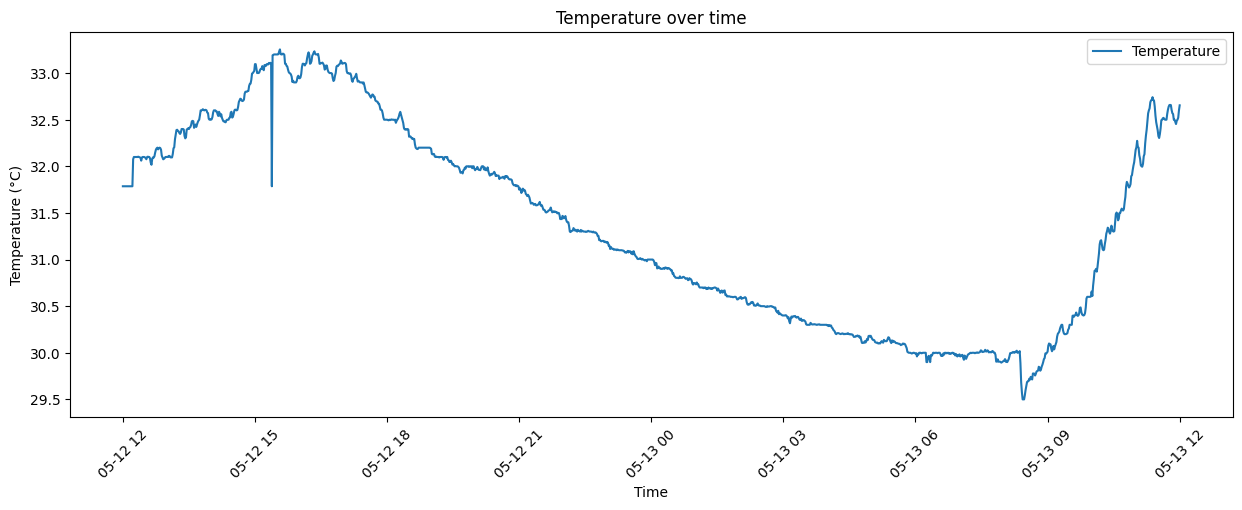

In [27]:
# Plot the temperature over time
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_day_one, x=df_day_one.index, y="temperature", label="Temperature")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Temperature over time")
plt.xticks(rotation=45)
plt.show()

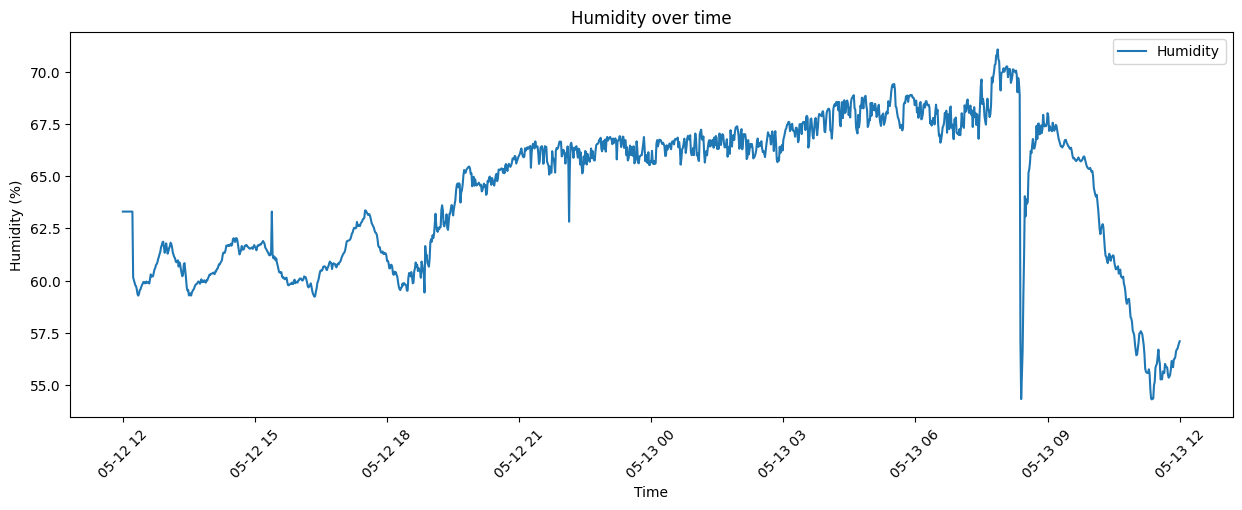

In [28]:
# Plot the humidity over time
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_day_one, x=df_day_one.index, y="humidity(%)", label="Humidity")
plt.xlabel("Time")
plt.ylabel("Humidity (%)")
plt.title("Humidity over time")
plt.xticks(rotation=45)
plt.show()

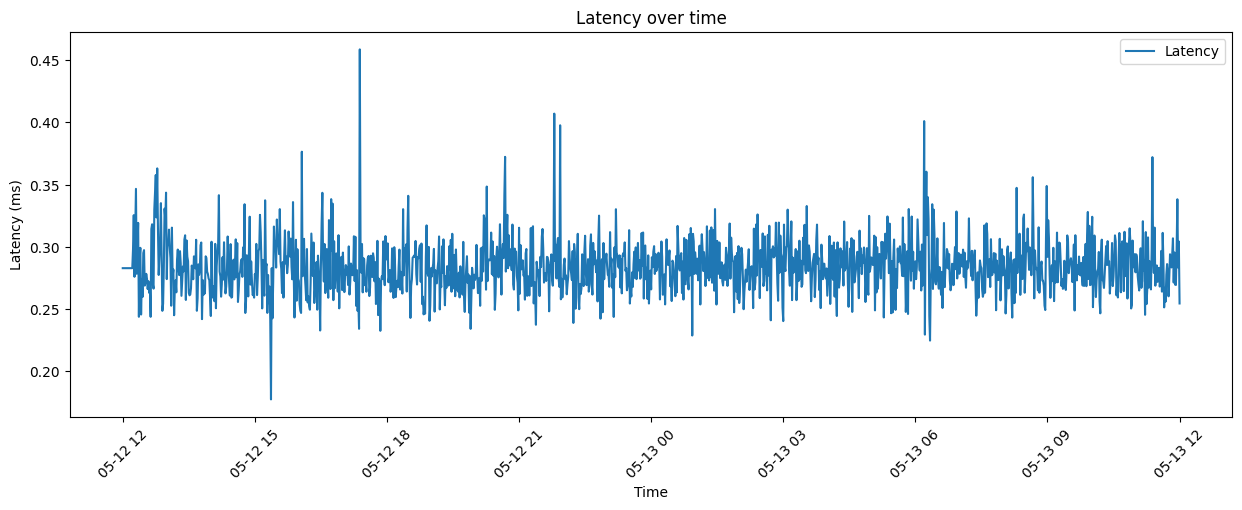

In [29]:
# Plot the latency over time
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_day_one, x=df_day_one.index, y="latency(ms)", label="Latency")
plt.xlabel("Time")
plt.ylabel("Latency (ms)")
plt.title("Latency over time")
plt.xticks(rotation=45)
plt.show()

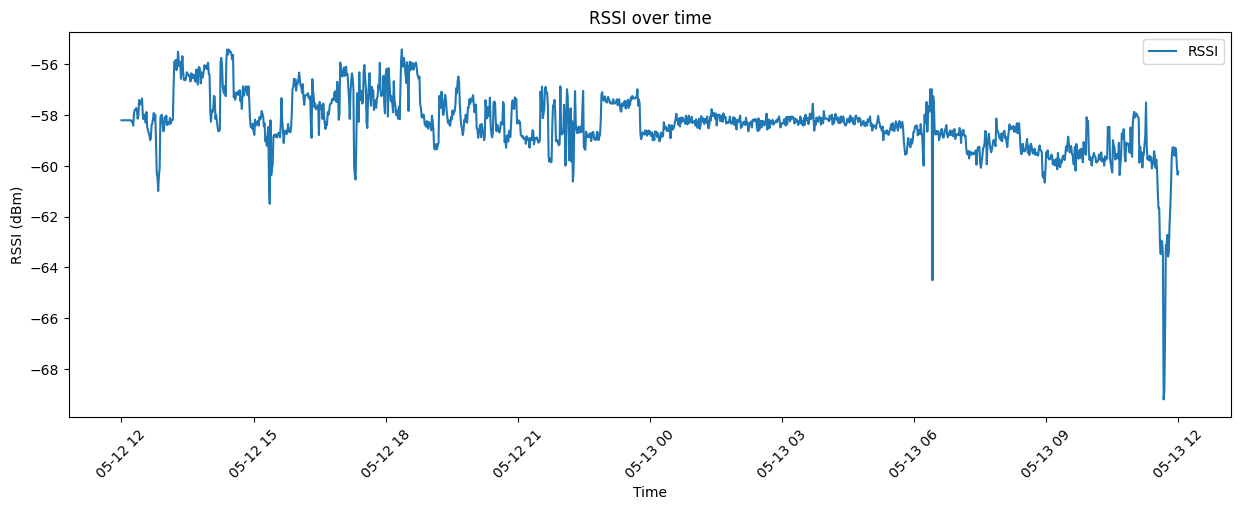

In [30]:
# Plot the RSSI over time
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_day_one, x=df_day_one.index, y="rssi(dBm)", label="RSSI")
plt.xlabel("Time")
plt.ylabel("RSSI (dBm)")
plt.title("RSSI over time")
plt.xticks(rotation=45)
plt.show()

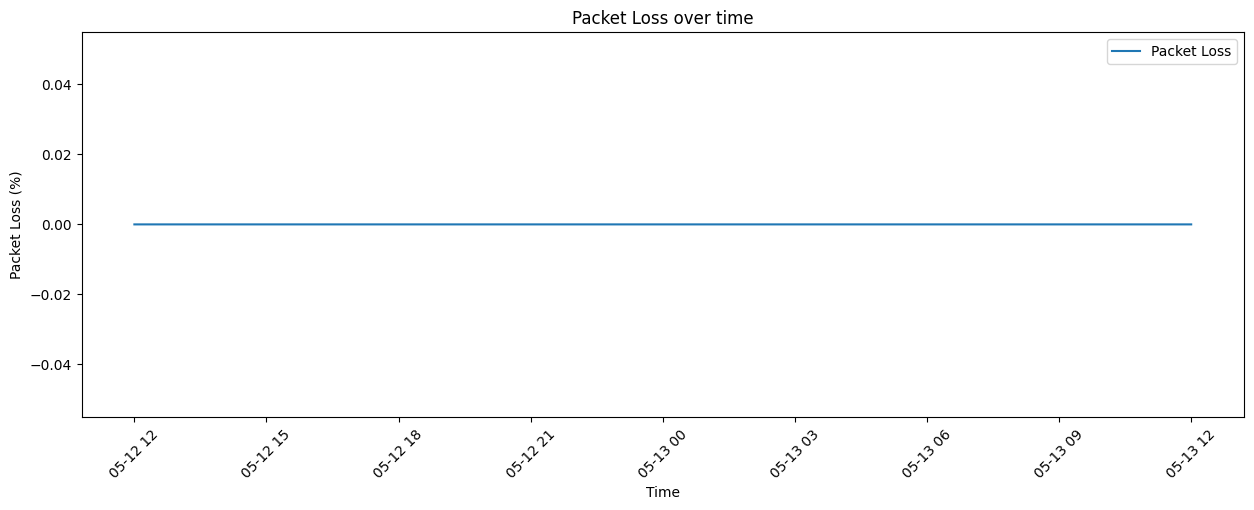

In [31]:
# Plot the RSSI over time
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_day_one, x=df_day_one.index, y="packet_loss(%)", label="Packet Loss")
plt.xlabel("Time")
plt.ylabel("Packet Loss (%)")
plt.title("Packet Loss over time")
plt.xticks(rotation=45)
plt.show()

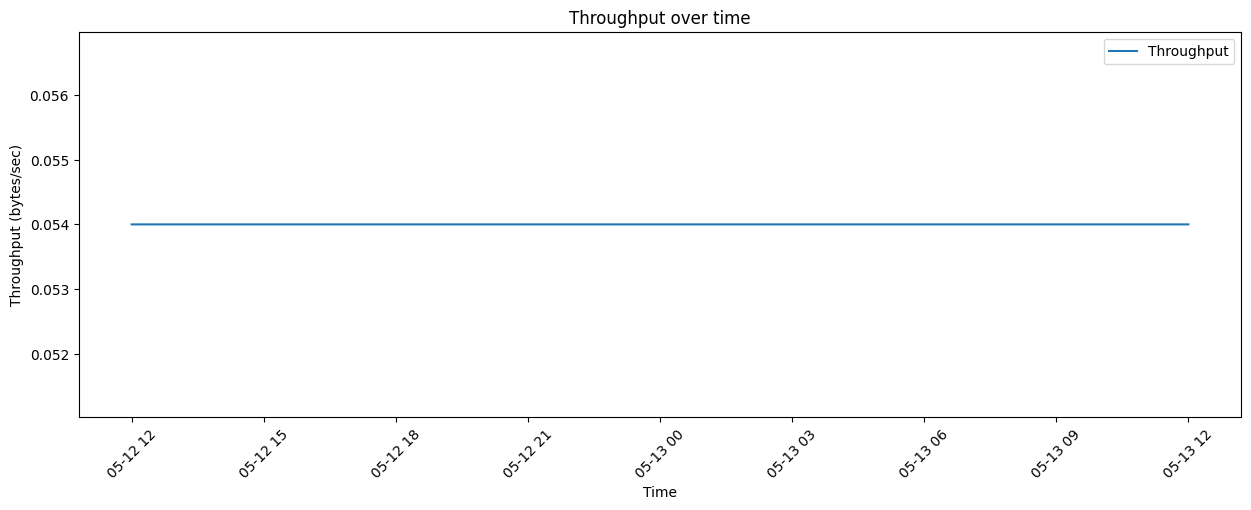

In [32]:
# Plot the RSSI over time
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_day_one, x=df_day_one.index, y="throughput(bytes/sec)", label="Throughput")
plt.xlabel("Time")
plt.ylabel("Throughput (bytes/sec)")
plt.title("Throughput over time")
plt.xticks(rotation=45)
plt.show()

### Exploratory Data Analysis

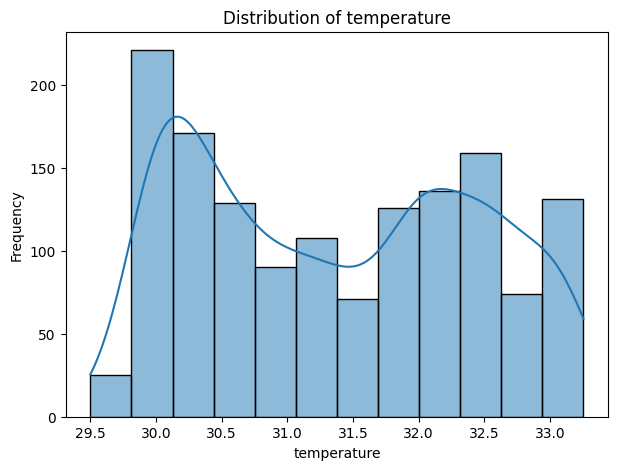

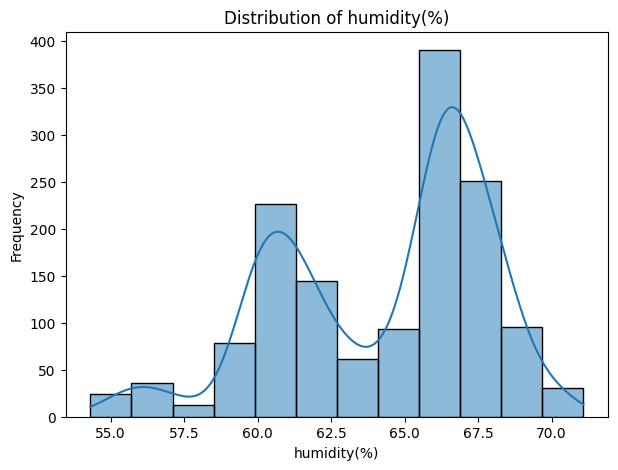

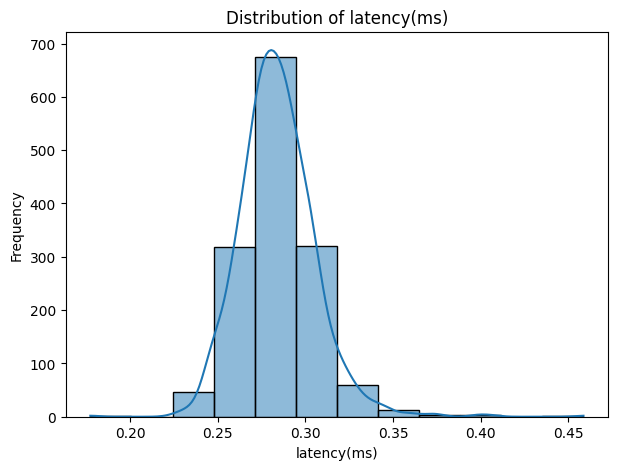

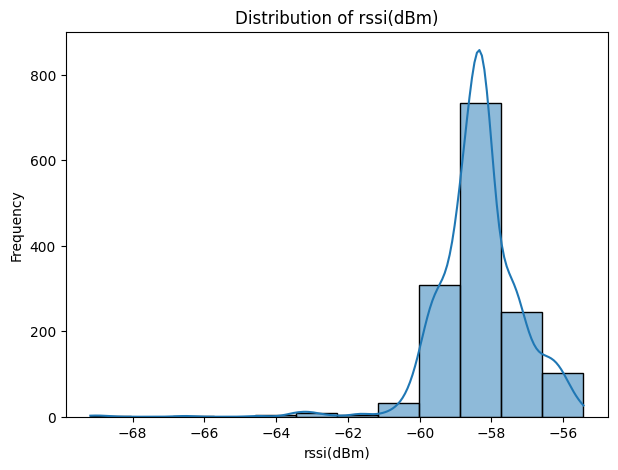

In [33]:
# Exclude the last columns, packet_loss(%) and throughput(bytes/sec)
df_one_day = df_day_one.drop(columns=["packet_loss(%)", "throughput(bytes/sec)", "time_str"])

# Visualize the distribution of the data
for i in df_one_day.columns:
    plt.figure(figsize=(7, 5))
    sns.histplot(data=df_one_day, x=i, bins=12, kde=True)
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {i}")
    plt.show()

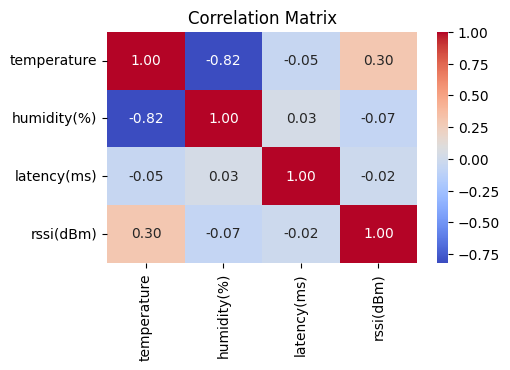

In [34]:
# Plot the correlation matrix with timestamp
plt.figure(figsize=(5, 3))
sns.heatmap(df_one_day.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()